# 01-Petrol_consumption

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
Petrol=pd.read_csv('01-Petrol_consumption.csv')

In [3]:
Petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Performing EDA

In [4]:
Petrol.shape

(48, 5)

In [5]:
Petrol.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

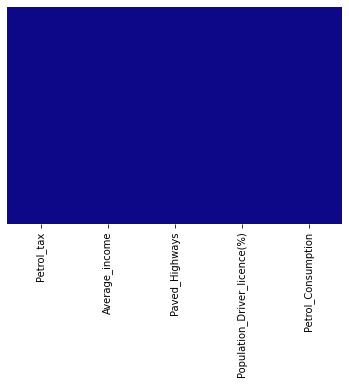

In [6]:
import seaborn as sns
sns.heatmap(Petrol.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [7]:
Petrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [8]:
Petrol.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [9]:
Petrol.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


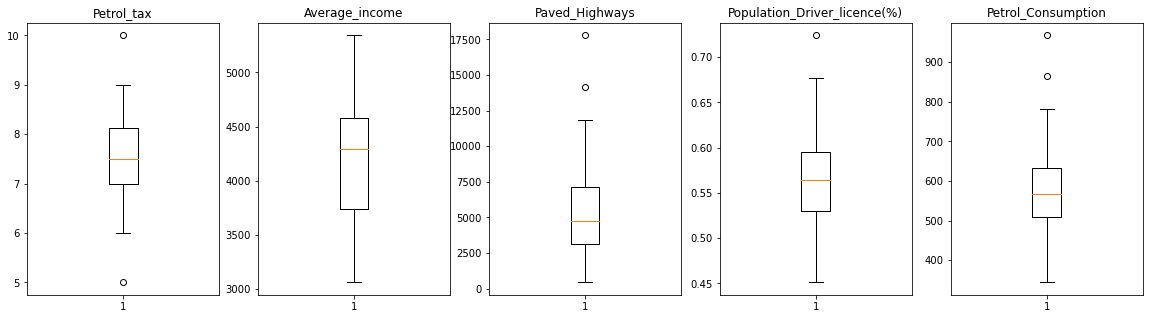

In [10]:
#checking for outliers on Numeric features
plt.figure(figsize = (20,5))
count = 1
for col in Petrol:
    plt.subplot(1,5,count)
    plt.boxplot(Petrol[col])
    plt.title(col)
    count +=1
        
plt.show()

# Remove outliers 

In [11]:
from scipy import stats
z = np.abs(stats.zscore(Petrol))
# threshold = 3
print(np.where(z > 3))

(array([36, 39], dtype=int64), array([2, 4], dtype=int64))


In [12]:
print(Petrol.iloc[[36,39]])

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
36         5.0            4045           17782                         0.566   
39         7.0            4345            3905                         0.672   

    Petrol_Consumption  
36                 640  
39                 968  


In [13]:
Petrol = Petrol[(z < 3).all(axis=1)]
Petrol.shape

(46, 5)

# Train Test Split

In [14]:
#Seperating X and y i.e features and label
X = Petrol.iloc[:,:-1].values
y = Petrol.iloc[:,-1].values


In [15]:
#data Standar
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [18]:
#prediction
y_pred = LR.predict(X_test)
print(LR.coef_)
print(LR.intercept_)

[-30.78759028 -39.92440406   3.4642639   69.03971374]
570.103856488177


In [19]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.5921577560586595

In [20]:
prediction_output =pd.DataFrame(data=[y_test,y_pred],index=['y_test','y_pred'])
prediction_output.transpose()

,y_test,y_pred
0,561.0,562.347279
1,554.0,590.021711
2,699.0,628.693899
3,464.0,403.921146
4,464.0,500.473422
5,566.0,644.416566
6,610.0,661.401584
7,487.0,504.303493
8,534.0,472.809491
9,591.0,550.638611
